## Описание проекта

Соревнование по предсказанию пользовательской оценки отелю.

Для оценки используется `MAPE` — средняя абсолютная ошибка в процентах. То есть на какой средний процент прогноз модели отклоняется от фактического значения. Чем **меньше** значение, тем **лучше** работает модель.
$$
\text{MAPE} = 100 \cdot \frac{1}{n} \sum_{t=1}^{n} \left| \frac{A_t - F_t}{A_t} \right|
$$

### Описание данных
- **`Hotel_Address`** - Адрес отеля.
- **`Review_Date`** - Дата публикации отзыва.
- **`Average_Score`** - Средняя оценка отеля, рассчитанная на основе комментариев за последний год.
- **`Hotel_Name`** - Название отеля.
- **`Reviewer_Nationality`** - Национальность рецензента.
- **`Negative_Review`** - Отрицательный отзыв, оставленный рецензентом отелю. В случае отсутствия заполняется значением `"No Negative"`.
- **`Review_Total_Negative_Word_Counts`** - Количество слов в отрицательном отзыве.
- **`Positive_Review`** - Положительный отзыв, оставленный рецензентом отелю. В случае отсутствия заполняется значением `"No Positive"`.
- **`Review_Total_Positive_Word_Counts`** - Количество слов в положительном отзыве.
- **`Total_Number_of_Reviews_Reviewer_Has_Given`** - Количество отзывов, написанных рецензентом в прошлом.
- **`Total_Number_of_Reviews`** - Количество отзывов об отеле.
- **`Tags`** - Теги, данные рецензентом отелю.
- **`days_since_review`** - Количество дней между написанием отзыва и чисткой.
- **`Additional_number_of_soring`** - Средний балл отеля, на основе всех оценок — с текстом отзыва и без.
- **`lat`** - Широта отеля.
- **`lng`** - Долгота отеля.
- **`Reviewer_Score`** - Оценка, данная рецензентом отелю. **Целевая переменная**.




In [15]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik

## Загрузка и предобработка данных

Загрузим тренировочную и тестовую выборки, после чего приведем их к единому стилю.

In [16]:
# Загружаем данные
df = pd.read_csv('data/train.csv', parse_dates=['Review_Date'])
test_df = pd.read_csv('data/test.csv', parse_dates=['Review_Date'])

In [17]:
# Выводим данные о тренировочном датасете
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Additional_Number_of_Scoring,412590.0,498.012994,1.0,169.0,341.0,660.0,2682.0,500.543501
Review_Date,412590,2016-08-13 15:26:43.286555648,2015-08-04 00:00:00,2016-02-23 00:00:00,2016-08-15 00:00:00,2017-02-09 00:00:00,2017-08-03 00:00:00,NaN
Review_Total_Negative_Word_Counts,412590.0,18.551618,0.0,2.0,9.0,23.0,408.0,29.663553
Total_Number_of_Reviews,412590.0,2744.936336,43.0,1161.0,2134.0,3633.0,16670.0,2319.361934
Review_Total_Positive_Word_Counts,412590.0,17.793614,0.0,5.0,11.0,22.0,395.0,21.820234
Total_Number_of_Reviews_Reviewer_Has_Given,412590.0,7.166359,1.0,1.0,3.0,8.0,355.0,11.057331
Reviewer_Score,412590.0,8.395058,2.5,7.5,8.8,9.6,10.0,1.63788
lat,409990.0,49.440722,41.328376,48.214277,51.499981,51.516384,52.400181,3.468718
lng,409990.0,2.826807,-0.369758,-0.143372,0.019886,4.834443,16.429233,4.575712


In [18]:
# Выводим данные в тренировочном датасете
df

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,Ndsm Plein 28 Amsterdam Noord 1033 WB Amsterda...,170,2017-04-17,DoubleTree by Hilton Hotel Amsterdam NDSM Wharf,United Kingdom,Too far from attractions Had to use ferry to ...,72,1593,Staff were very helpful Good breakfast,8,1,5.4,"[' Leisure trip ', ' Couple ', ' Queen Guest R...",108 day,52.400181,4.893665
1,Ferdinand Bolstraat 194 Oud Zuid 1072 LW Amste...,114,2016-05-26,Savoy Hotel Amsterdam,Malaysia,Staff should handle customer document during ...,246,995,Very clean and cozy room Friendly and helpful...,41,1,9.6,"[' Leisure trip ', ' Couple ', ' Small Double ...",434 day,52.349743,4.891191
2,18 Albert Embankment Lambeth London SE1 7TJ Un...,1195,2016-12-04,Park Plaza London Riverbank,United Kingdom,The hot breakfast could have been fresher tas...,19,4684,The room was to a high standard The staff wer...,19,3,8.8,"[' Business trip ', ' Solo traveler ', ' Super...",242 day,51.491374,-0.121419
3,Schottenring 24 01 Innere Stadt 1010 Vienna Au...,111,2017-04-30,Palais Hansen Kempinski Vienna,Oman,You have to pay the full amount before arrivi...,14,865,Everything was excellent,5,21,10.0,"[' Leisure trip ', ' Couple ', ' Deluxe Room '...",95 days,48.216315,16.368510
4,Sabino de Arana 22 24 Les Corts 08028 Barcelon...,147,2017-01-22,Catalonia Rigoletto,United Kingdom,All Good,3,1562,The location was excellent for visiting the N...,11,1,9.2,"[' Leisure trip ', ' Family with young childre...",193 day,41.385817,2.125679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412585,7 Gracechurch Street City of London London EC3...,764,2017-03-31,Club Quarters Hotel Gracechurch,Belgium,Most of the coffee shops around the hotel are...,24,2996,Good location at walking distance to metro st...,75,28,9.2,"[' Leisure trip ', ' Couple ', ' Small Queen R...",125 day,51.512796,-0.084797
412586,Westminster Bridge Road Lambeth London SE1 7UT...,2623,2017-05-19,Park Plaza Westminster Bridge London,United Kingdom,Bar rather expensive,4,12158,Location and quality of the go Room was a gre...,17,4,10.0,"[' Leisure trip ', ' Family with young childre...",76 days,51.500961,-0.116591
412587,2 Stanhope Row Park Lane Westminster Borough L...,444,2015-12-07,Park Lane Mews Hotel,United Kingdom,Lack of ironing facilities Asked for iron to ...,21,2061,Excellent location comfortable and clean,6,1,7.9,"[' Business trip ', ' Solo traveler ', ' Doubl...",605 day,51.505933,-0.148942
412588,No 1 Seething Lane City of London London EC3N ...,623,2017-04-16,Apex City Of London Hotel,United Kingdom,Having stayed at this hotel a number of times...,29,2750,All the staff where very friendly helpful Hot...,41,4,8.3,"[' Leisure trip ', ' Couple ', ' City King or ...",109 day,51.510462,-0.079550


In [19]:
# Выделяем год месяц и день
df['review_year'] = df['Review_Date'].dt.year
df['review_month'] = df['Review_Date'].dt.month
df['review_day'] = df['Review_Date'].dt.day

# Преобразуем столбец с днями в числовой
df['days_since_review'] = df['days_since_review'].apply(lambda x: x.split()[0]).astype('int64')
df['days_since_review'].head()

0    108
1    434
2    242
3     95
4    193
Name: days_since_review, dtype: int64

In [20]:
# Выводим данные о тестовом датасете
test_df.describe().T

,count,mean,min,25%,50%,75%,max,std
Additional_Number_of_Scoring,103148.0,498.357205,1.0,169.0,341.5,660.0,2682.0,500.520661
Review_Date,103148,2016-08-13 05:11:12.478380544,2015-08-04 00:00:00,2016-02-22 00:00:00,2016-08-15 00:00:00,2017-02-09 00:00:00,2017-08-03 00:00:00,NaN
Review_Total_Negative_Word_Counts,103148.0,18.49078,0.0,2.0,9.0,23.0,403.0,29.799785
Total_Number_of_Reviews,103148.0,2738.974396,43.0,1164.0,2134.0,3611.0,16670.0,2309.866121
Review_Total_Positive_Word_Counts,103148.0,17.707837,0.0,5.0,11.0,22.0,383.0,21.739841
Total_Number_of_Reviews_Reviewer_Has_Given,103148.0,7.164569,1.0,1.0,3.0,8.0,297.0,10.971602
lat,102480.0,49.44931,41.328376,48.214662,51.500198,51.516288,52.400181,3.456744
lng,102480.0,2.811787,-0.369758,-0.143671,-0.00025,4.820783,16.429233,4.594254


In [21]:
# Выводим данные в тестовом датасете
test_df

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Tags,days_since_review,lat,lng
0,7 Western Gateway Royal Victoria Dock Newham L...,359,2015-08-14,Novotel London Excel,United Kingdom,No Negative,0,1158,Excellent location for Excel centre Friendly ...,14,5,"[' Leisure trip ', ' Family with young childre...",720 day,51.507720,0.022981
1,Great Cumberland Place Westminster Borough Lon...,1190,2017-08-03,The Cumberland A Guoman Hotel,Gibraltar,No Negative,0,5180,The location was excellent rieally good next ...,11,2,"[' Leisure trip ', ' Group ', ' Standard Doubl...",0 days,51.514879,-0.160650
2,14 Rue de la Sorbonne 5th arr 75005 Paris France,37,2016-04-27,Hotel Mercure La Sorbonne Saint Germain des Pr s,United Kingdom,The beds were uncomfortable We requested a do...,31,464,The buffet breakfast was excellent The breakf...,22,1,"[' Leisure trip ', ' Couple ', ' Standard Doub...",463 day,48.849350,2.343057
3,4 Broad Court Bow Street Covent Garden Westmin...,294,2016-03-03,Fielding Hotel,United Kingdom,No negatives,3,1271,Beautifully appointed room and incredibly pla...,19,12,"[' Leisure trip ', ' Couple ', ' Double Room '...",518 day,51.513931,-0.121989
4,79 81 avenue du Maine 14th arr 75014 Paris France,201,2016-05-02,Holiday Inn Paris Gare Montparnasse,Australia,Not having subtitles on the TV in english,10,3228,Close to transport shops resturants and attra...,18,2,"[' Leisure trip ', ' Couple ', ' Twin Room Non...",458 day,48.838292,2.323019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103143,Via Napo Torriani 18 Central Station 20124 Mil...,384,2016-12-01,Hotel Berna,United Kingdom,No Negative,0,4017,Excellent friendly staff great breakfast buffet,7,5,"[' Leisure trip ', ' Solo traveler ', ' Qualit...",245 day,45.482669,9.203437
103144,97 Great Russell Street Bloomsbury Camden Lond...,406,2017-07-03,Radisson Blu Edwardian Kenilworth,Australia,I would love to have been able to turn the ai...,26,2011,The staff were helpful and friendly Breakfast...,89,4,"[' Leisure trip ', ' Group ', ' Standard Doubl...",31 days,51.517972,-0.128050
103145,Oosterdoksstraat 4 Amsterdam City Center 1011 ...,803,2015-11-24,DoubleTree by Hilton Amsterdam Centraal Station,United Kingdom,A little bit expensive,5,3911,Everything location room staff food and parking,8,1,"[' Leisure trip ', ' Couple ', ' Executive Que...",618 day,52.376752,4.904618
103146,St Katherines Way Tower Hamlets London E1W 1LD...,950,2016-09-01,The Tower A Guoman Hotel,United Kingdom,nothing everything was great,6,3486,I stay at this hotel every time we stay in Lo...,50,1,"[' Leisure trip ', ' Couple ', ' Standard Doub...",336 day,51.506472,-0.071689


In [22]:
# Выделяем год месяц и день
test_df['review_year'] = test_df['Review_Date'].dt.year
test_df['review_month'] = test_df['Review_Date'].dt.month
test_df['review_day'] = test_df['Review_Date'].dt.day

test_df['days_since_review'] = test_df['days_since_review'].apply(lambda x: x.split()[0]).astype('int64')
test_df['days_since_review'].head()

0    720
1      0
2    463
3    518
4    458
Name: days_since_review, dtype: int64

In [23]:
# Проверяем, совпадают ли все столбцы в датасетах
set(df.columns)-set(test_df.columns)

{'Reviewer_Score'}

In [24]:
# Переименовываем столбцы в тренировочном датасете
df = df.rename(columns={
    'Hotel_Address': 'address',
    'Review_Date': 'review_date',
    'Average_Score': 'avg_hotel_score',
    'Hotel_Name': 'hotel',
    'Reviewer_Nationality': 'nationality',
    'Negative_Review': 'negative_review',
    'Review_Total_Negative_Word_Counts': 'negative_words',
    'Positive_Review': 'positive_review',
    'Review_Total_Positive_Word_Counts': 'positive_words',
    'Total_Number_of_Reviews_Reviewer_Has_Given': 'total_reviews',
    'Total_Number_of_Reviews': 'hotel_review_count',
    'Tags': 'tags',
    'days_since_review': 'days_since_review',
    'Additional_Number_of_Scoring': 'avg_scoring_rating',
    'lat': 'latitude',
    'lng': 'longitude',
    'Reviewer_Score': 'score'  # Целевая переменная
})

# Проверяем, корректно ли мы все переименовали
df.columns

Index(['address', 'avg_scoring_rating', 'review_date', 'hotel', 'nationality',
       'negative_review', 'negative_words', 'hotel_review_count',
       'positive_review', 'positive_words', 'total_reviews', 'score', 'tags',
       'days_since_review', 'latitude', 'longitude', 'review_year',
       'review_month', 'review_day'],
      dtype='object')

In [25]:
# Переименовываем столбцы в тренировочном датасете
test_df = test_df.rename(columns={
    'Hotel_Address': 'address',
    'Review_Date': 'review_date',
    'Average_Score': 'avg_hotel_score',
    'Hotel_Name': 'hotel',
    'Reviewer_Nationality': 'nationality',
    'Negative_Review': 'negative_review',
    'Review_Total_Negative_Word_Counts': 'negative_words',
    'Positive_Review': 'positive_review',
    'Review_Total_Positive_Word_Counts': 'positive_words',
    'Total_Number_of_Reviews_Reviewer_Has_Given': 'total_reviews',
    'Total_Number_of_Reviews': 'hotel_review_count',
    'Tags': 'tags',
    'days_since_review': 'days_since_review',
    'Additional_Number_of_Scoring': 'avg_scoring_rating',
    'lat': 'latitude',
    'lng': 'longitude',
})

# Проверяем, корректно ли мы все переименовали
test_df.columns

Index(['address', 'avg_scoring_rating', 'review_date', 'hotel', 'nationality',
       'negative_review', 'negative_words', 'hotel_review_count',
       'positive_review', 'positive_words', 'total_reviews', 'tags',
       'days_since_review', 'latitude', 'longitude', 'review_year',
       'review_month', 'review_day'],
      dtype='object')

### Вывод

Мы загрузили данные, переименовали столбцы, приведя их к единому стилю. Теперь столбцы выглядят так:
- **`address`** - Адрес отеля.
- **`review_date`** - Дата публикации отзыва.
- **`avg_hotel_score`** - Средняя оценка отеля, рассчитанная на основе комментариев за последний год.
- **`hotel`** - Название отеля.
- **`nationality`** - Национальность рецензента.
- **`negative_review`** - Отрицательный отзыв, оставленный рецензентом отелю. В случае отсутствия заполняется значением `"No Negative"`.
- **`negative_words`** - Количество слов в отрицательном отзыве.
- **`positive_review`** - Положительный отзыв, оставленный рецензентом отелю. В случае отсутствия заполняется значением `"No Positive"`.
- **`positive_words`** - Количество слов в положительном отзыве.
- **`total_reviews`** - Количество отзывов, написанных рецензентом в прошлом.
- **`hotel_review_count`** - Общее количество отзывов об отеле.
- **`tags`** - Теги, данные рецензентом отелю.
- **`days_since_review`** - Количество дней между написанием отзыва и текущей датой (или "чисткой").
- **`avg_scoring_rating`** - Средний балл отеля, рассчитанный на основе всех оценок — как с текстом отзыва, так и без него.
- **`latitude`** - Широта местоположения отеля.
- **`longitude`** - Долгота местоположения отеля.
- **`score`** - Оценка, данная рецензентом отелю. **Целевая переменная**.

## Предобработка данных

Проверим данные на распределения, на наличие пропусков, явных и неявных дубликатов. Для этого определим числовые и категориальные столбцы

In [37]:
# Числовые столбцы
num_cols = ['avg_scoring_rating', 'score',
            'negative_words', 'positive_words',
            'hotel_review_count', 'total_reviews']

# Категориальные столбцы
cat_cols = ['address', 'hotel', 'nationality', 'negative_review', 'positive_review', 'tags']

# Столбцы с датой
date_cols = ['days_since_review', 'review_year', 'review_month', 'review_day']

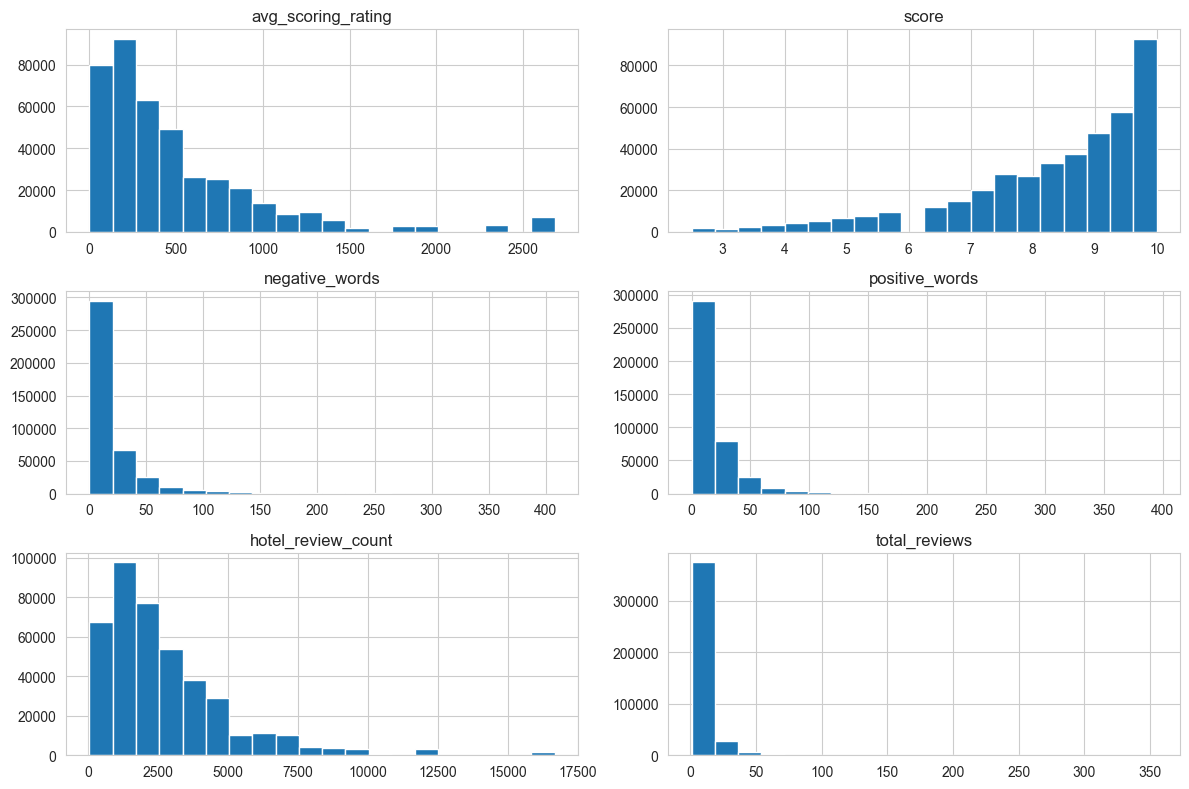

In [38]:
plt.figure(figsize = (12, 8))

# Выводим гистограмму по данным
for i, col in enumerate(num_cols):
   plt.subplot(3, 2, i + 1)
   plt.hist(df[col], bins = 20)
   plt.title(col)

plt.tight_layout()
plt.show()

Мы видим, что у нас почти во всех столбцах есть выбросы около нуля, ничего экстраординарного. Интерес вызывает только столбец `score`, так как "провал" в значении "6". У нас проблема

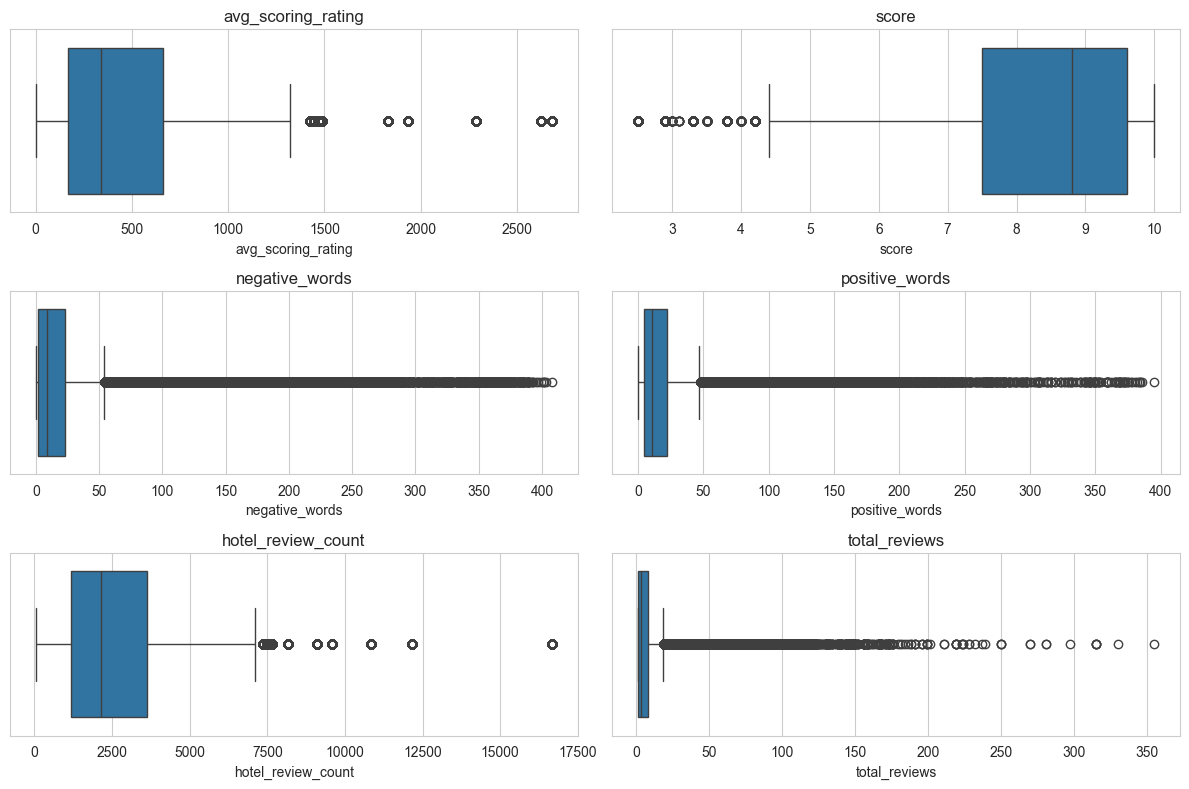

In [42]:
plt.figure(figsize = (12, 8))

# Выводим диаграммы размаха
for i, col in enumerate(num_cols):
   plt.subplot(3, 2, i + 1)
   sns.boxplot(x=col, data=df)
   plt.title(col)

plt.tight_layout()
plt.show()

Мы так же видим, что у нас присутствуют выбросы, но они в пределах "нормы". Никаких сверхбольших значений не наблюдаем, скорее всего это просто единичные большие отели. Возможно, стоит удалить отели, у которых больше 8000 отзывов. Это единичные случаи, которые могут помешать модели уловить закономерность. Нужно посмотреть, какое количество записей с отелями, у которых много отзывов